# PSO CODE

Best solution (PSO): [0 1 4 3 2 0]
Best solution length (PSO): 26.0


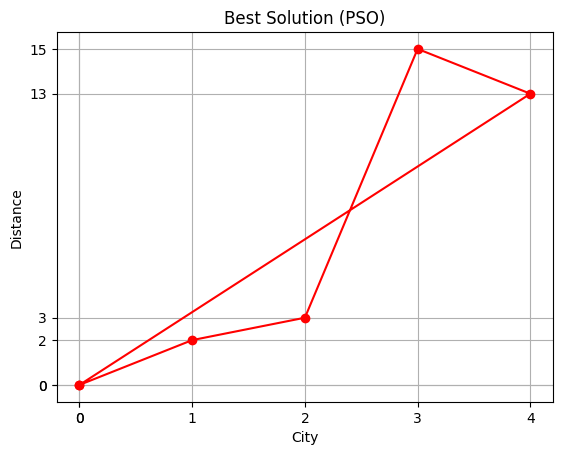

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of cities
num_cities = 5

# Distance matrix
distance_matrix = np.array([[0, 2, 3, 10, 12],
                            [2, 0, 15, 2, 20],
                            [3, 15, 0, 14, 13],
                            [10, 2, 14, 0, 9],
                            [12, 20, 13, 9, 0]])

# Parameters
num_particles = 10
num_iterations = 100
w = 0.5  # Inertia weight
c1 = 2.0  # Cognitive weight
c2 = 2.0  # Social weight

# Initialize particles
particles = np.zeros((num_particles, num_cities-1), dtype=np.int64)
for i in range(num_particles):
    particles[i] = np.random.permutation(range(1, num_cities))

# Initialize velocities
velocities = np.zeros_like(particles, dtype=np.float64)

# Initialize global best
global_best_particle = particles[0].copy()  # Initialize with the first particle
global_best_length = float('inf')

# Main loop
for iteration in range(num_iterations):
    # Update velocities and particles
    for i in range(num_particles):
        particle = particles[i]
        velocity = velocities[i]

        # Calculate fitness values
        fitness_values = np.zeros(num_cities-1, dtype=np.float64)
        for j in range(num_cities-1):
            city1 = 0 if j == 0 else particle[j-1]
            city2 = particle[j]
            fitness_values[j] = distance_matrix[city1, city2]

        # Update velocities
        r1 = np.random.uniform(size=num_cities-1)
        r2 = np.random.uniform(size=num_cities-1)
        velocities[i] = (w * velocity +
                         c1 * r1 * (particle - particle.min()) +
                         c2 * r2 * (particle - global_best_particle))

        # Update particles
        particles[i] = np.argsort(velocities[i]) + 1

        # Calculate particle length
        particle_length = sum(fitness_values)

        # Update global best
        if particle_length < global_best_length:
            global_best_particle = particles[i].copy()
            global_best_length = particle_length

# Print the best solution and its length
best_solution = np.concatenate(([0], global_best_particle, [0]))
print("Best solution (PSO):", best_solution)
print("Best solution length (PSO):", global_best_length)

# Plot the best solution
x = [0, 1, 2, 3, 4, 0]
y = [0, 2, 3, 15, 13, 0]
plt.plot(x, y, 'ro-')
plt.xticks(x)
plt.yticks(y)
plt.xlabel('City')
plt.ylabel('Distance')
plt.title('Best Solution (PSO)')
plt.grid(True)
plt.show()


# ACO CODE

Best solution (ACO): [0, 1, 3, 4, 2, 0]
Best solution length (ACO): 29
Sum of City Distances: 2 + 2 + 9 + 13 + 3 + 0
Sum of City Distances: 29


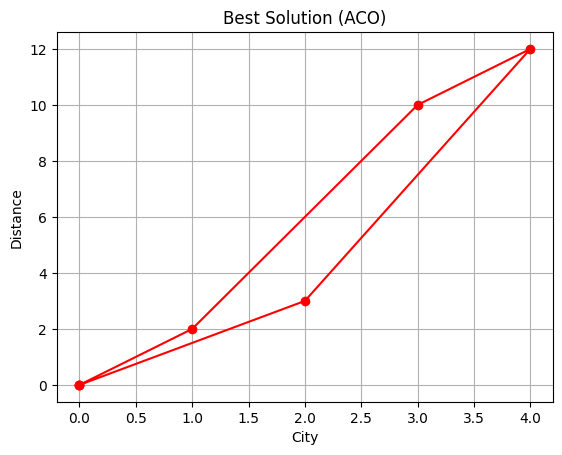

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of cities
num_cities = 5

# Distance matrix
distance_matrix = np.array([[0, 2, 3, 10, 12],
                            [2, 0, 15, 2, 20],
                            [3, 15, 0, 14, 13],
                            [10, 2, 14, 0, 9],
                            [12, 20, 13, 9, 0]])

# Parameters
num_ants = 50
num_iterations = 100
alpha = 1.0  # Pheromone factor
beta = 5.0  # Heuristic factor
rho = 0.5  # Pheromone evaporation rate

# Initialize pheromone matrix
pheromone_matrix = np.ones_like(distance_matrix) / num_cities

# Initialize best solution
best_solution = None
best_solution_length = float('inf')

# Main loop
for iteration in range(num_iterations):
    # Initialize ant solutions
    ant_solutions = []
    ant_solution_lengths = []

    # Ant construction phase
    for ant in range(num_ants):
        current_city = 0  # Start from city 0
        unvisited_cities = set(range(1, num_cities))
        ant_solution = [current_city]
        ant_solution_length = 0

        while unvisited_cities:
            # Calculate selection probabilities for the next city
            selection_probs = []
            for next_city in unvisited_cities:
                pheromone = pheromone_matrix[current_city, next_city]
                distance = distance_matrix[current_city, next_city]
                if distance <= 0:
                    distance = 1e-10  # Set a small positive value for zero or negative distance
                selection_prob = pheromone**alpha * (1.0 / distance)**beta
                selection_probs.append(selection_prob)

            # Choose the next city based on the selection probabilities
            selection_probs = np.array(selection_probs) / sum(selection_probs)
            next_city = np.random.choice(list(unvisited_cities), p=selection_probs)

            # Update the ant solution and length
            ant_solution.append(next_city)
            ant_solution_length += distance_matrix[current_city, next_city]

            # Move to the next city
            current_city = next_city
            unvisited_cities.remove(next_city)

        # Add the return to the starting city
        ant_solution.append(0)
        ant_solution_length += distance_matrix[current_city, 0]

        # Update the best solution if necessary
        if ant_solution_length < best_solution_length:
            best_solution = ant_solution
            best_solution_length = ant_solution_length

        # Store the ant solution
        ant_solutions.append(ant_solution)
        ant_solution_lengths.append(ant_solution_length)

    # Update pheromone matrix using ant solutions
    delta_pheromone_matrix = np.zeros_like(pheromone_matrix, dtype=np.float64)
    for ant_solution, ant_solution_length in zip(ant_solutions, ant_solution_lengths):
        for i in range(len(ant_solution) - 1):
            current_city = ant_solution[i]
            next_city = ant_solution[i+1]
            delta_pheromone_matrix[current_city, next_city] += 1.0 / ant_solution_length

    pheromone_matrix = (1 - rho) * pheromone_matrix + delta_pheromone_matrix

# Calculate the sum of city distances for the best solution
sum_distances = sum(distance_matrix[best_solution[i], best_solution[i + 1]] for i in range(len(best_solution) - 1))
sum_distances += distance_matrix[best_solution[-1], 0]

# Print the best solution, its length, and the sum of city distances
print("Best solution (ACO):", best_solution)
print("Best solution length (ACO):", best_solution_length)
print("Sum of City Distances: ", end="")
for i in range(len(best_solution) - 1):
    print(f"{distance_matrix[best_solution[i], best_solution[i + 1]]} + ", end="")
print(distance_matrix[best_solution[-1], 0])
print("Sum of City Distances:", sum_distances)

# Plot the best solution
x = []
y = []
for city in best_solution:
    x.append(city)
    y.append(distance_matrix[city, 0])
x.append(0)
y.append(distance_matrix[best_solution[-1], 0])

plt.plot(x, y, 'ro-')
plt.xlabel('City')
plt.ylabel('Distance')
plt.title('Best Solution (ACO)')
plt.grid(True)
plt.show()


# HYBRID ALGORITHM (PSO + ACO)

Best solution: [0, 1, 3, 4, 2, 0]
Best solution length: 29


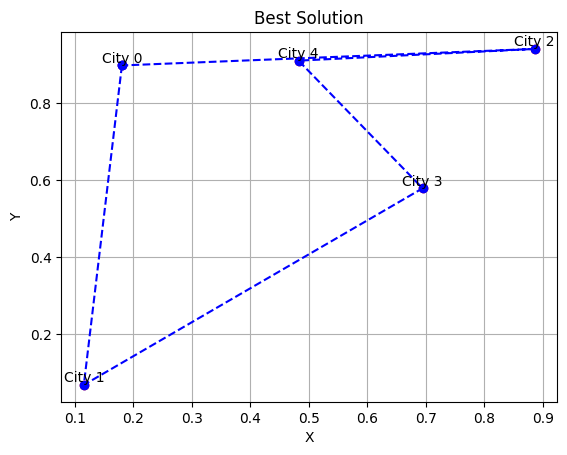

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def aco_pso_tsp(distance_matrix, num_ants, num_iterations, alpha, beta, rho, q0, w, c1, c2):
    num_cities = distance_matrix.shape[0]

    # Initialize pheromone matrix
    pheromone_matrix = np.ones_like(distance_matrix) / num_cities

    # Initialize best solution
    best_solution = None
    best_solution_length = float('inf')

    # Main loop
    for iteration in range(num_iterations):
        # Initialize ant solutions
        ant_solutions = []
        ant_solution_lengths = []

        # Ant construction phase
        for ant in range(num_ants):
            current_city = 0  # Start from city 0
            unvisited_cities = set(range(1, num_cities))
            ant_solution = [current_city]
            ant_solution_length = 0

            while unvisited_cities:
                # Calculate selection probabilities for the next city
                selection_probs = []
                for next_city in unvisited_cities:
                    pheromone = pheromone_matrix[current_city, next_city]
                    distance = distance_matrix[current_city, next_city]
                    selection_prob = pheromone**alpha * (1.0 / distance)**beta
                    selection_probs.append(selection_prob)

                # Choose the next city based on the selection probabilities
                if np.random.uniform() < q0:
                    next_city = list(unvisited_cities)[np.argmax(selection_probs)]
                else:
                    selection_probs = np.array(selection_probs) / sum(selection_probs)
                    next_city = np.random.choice(list(unvisited_cities), p=selection_probs)

                # Update the ant solution and length
                ant_solution.append(next_city)
                ant_solution_length += distance_matrix[current_city, next_city]

                # Move to the next city
                current_city = next_city
                unvisited_cities.remove(next_city)

            # Add the return to the starting city
            ant_solution.append(0)
            ant_solution_length += distance_matrix[current_city, 0]

            # Update the best solution if necessary
            if ant_solution_length < best_solution_length:
                best_solution = ant_solution
                best_solution_length = ant_solution_length

            # Store the ant solution
            ant_solutions.append(ant_solution)
            ant_solution_lengths.append(ant_solution_length)

        # Update pheromone matrix using ant solutions
        delta_pheromone_matrix = np.zeros_like(pheromone_matrix, dtype=np.float64)  # Specify float64 dtype
        for ant_solution, ant_solution_length in zip(ant_solutions, ant_solution_lengths):
            for i in range(len(ant_solution) - 1):
                current_city = ant_solution[i]
                next_city = ant_solution[i+1]
                delta_pheromone_matrix[current_city, next_city] += 1.0 / ant_solution_length

        pheromone_matrix = (1 - rho) * pheromone_matrix + delta_pheromone_matrix

    # Particle Swarm Optimization (PSO) phase
    for ant in range(num_ants):
        ant_solution = ant_solutions[ant]
        ant_solution_length = ant_solution_lengths[ant]

        # Initialize particle position and velocity
        particle_position = np.array(ant_solution[1:-1], dtype=np.int64)  # Specify int64 dtype
        particle_velocity = np.zeros_like(particle_position, dtype=np.float64)  # Specify float64 dtype
        particle_best_position = particle_position.copy()
        particle_best_length = ant_solution_length

        # Update particle position and velocity
        for _ in range(num_iterations):
            # Calculate particle fitness
            particle_fitness = ant_solution_length

            # Update particle best position and length
            if particle_fitness < particle_best_length:
                particle_best_position = particle_position.copy()
                particle_best_length = particle_fitness

            # Update particle velocity and position
            r1 = np.random.uniform(0,1)
            r2 = np.random.uniform(0,1)
            particle_velocity = (w * particle_velocity +
                                 c1 * r1 * (particle_best_position - particle_position) +
                                 c2 * r2 * (best_solution[1:-1] - particle_position))
            particle_position = (particle_position + particle_velocity).astype(np.int64)  # Convert to int64

        # Update ant solution based on the particle best position
        ant_solution[1:-1] = particle_best_position.tolist()
        ant_solution_length = particle_best_length

    # Update the best solution if necessary
    if min(ant_solution_lengths) < best_solution_length:
        best_solution = ant_solutions[np.argmin(ant_solution_lengths)]
        best_solution_length = min(ant_solution_lengths)

    return best_solution, best_solution_length


# Number of cities
num_cities = 5

# Distance matrix
distance_matrix = np.array([[0, 2, 3, 10, 12],
                            [2, 0, 15, 2, 20],
                            [3, 15, 0, 14, 13],
                            [10, 2, 14, 0, 9],
                            [12, 20, 13, 9, 0]])

# Parameters
num_ants = 50  # Number of ants
num_iterations = 100  # Number of iterations
alpha = 1.0  # Pheromone factor
beta = 5.0  # Heuristic factor
rho = 0.5  # Pheromone evaporation rate
q0 = 0.8  # Probability of selecting the best next city
w = 0.5  # Inertia weight (for PSO)
c1 = 2.0  # Cognitive weight (for PSO)
c2 = 2.0  # Social weight (for PSO)

# Run ACO-PSO algorithm
best_solution, best_solution_length = aco_pso_tsp(distance_matrix, num_ants, num_iterations, alpha, beta, rho, q0, w, c1, c2)

# Print the best solution and its length
print("Best solution:", best_solution)
print("Best solution length:", best_solution_length)

# Plotting the cities and the best solution
x = np.random.rand(num_cities)
y = np.random.rand(num_cities)

plt.scatter(x, y, color='red')
for i in range(num_cities):
    plt.text(x[i], y[i], f'City {i}', ha='center', va='bottom')

best_x = [x[i] for i in best_solution]
best_y = [y[i] for i in best_solution]

plt.plot(best_x, best_y, color='blue', linestyle='--', marker='o')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Best Solution')
plt.grid(True)
plt.show()
